# Polynomial Multiple Regression

Polynomial multiple regression (or multivariate polynomial regression) extends polynomial regression to handle multiple independent variables. It fits a nonlinear relationship between the dependent variable and two or more independent variables, where the independent variables can be raised to powers or combined as interaction terms.

## Form of the Polynomial Multiple Regression Equation

For two independent variables $x_1$ and $x_2$, a second-degree polynomial regression model would take the form:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_2^2 + \beta_5 x_1 x_2 + \epsilon
$$

Where:
- $y$ is the dependent variable (what you are trying to predict).
- $x_1, x_2$ are the independent variables (input features).
- $\beta_0, \beta_1, \ldots, \beta_5$ are the coefficients of the regression (these are the parameters to be estimated).
- $\epsilon$ is the error term (the difference between the observed value and the predicted value).

The model can also be extended to more than two variables, and higher-degree polynomials can be used. For example, a third-degree polynomial model might include terms like $x_1^3$, $x_2^3$, and interaction terms like $x_1^2 x_2$.

## Goal of Polynomial Multiple Regression

The goal is to find the coefficients $\beta_0, \beta_1, \ldots$ that minimize the sum of squared errors (SSE) between the predicted and actual values, as in linear regression:

$$
\text{SSE} = \sum (y_i - \hat{y_i})^2
$$

Where:
- $y_i$ is the actual value of the dependent variable.
- $\hat{y_i}$ is the predicted value from the polynomial regression equation.

## Assumptions of Polynomial Multiple Regression

The assumptions for polynomial multiple regression are similar to those of linear regression:

1. **Linearity**: The relationship between the transformed independent variables ($x_1, x_2, x_1^2, x_2^2, x_1 x_2, \ldots$) and the dependent variable is linear.
2. **Independence**: The residuals (errors) are independent of each other.
3. **Homoscedasticity**: The variance of residuals is constant across all levels of the independent variables.
4. **Normality of residuals**: The residuals are normally distributed.
5. **No multicollinearity**: The independent variables should not be too highly correlated with each other.

## Example

Let’s consider an example where we want to predict the price of a house based on multiple factors such as the number of bedrooms ($x_1$) and the square footage ($x_2$). A second-degree polynomial multiple regression model might look like this:

$$
\text{Price} = 50,000 + 10,000 \times (\text{Bedrooms}) + 200 \times (\text{Sq. Ft.}) + 1,000 \times (\text{Bedrooms}^2) - 0.1 \times (\text{Sq. Ft.}^2) + 50 \times (\text{Bedrooms} \times \text{Sq. Ft.})
$$

In this example:
- $\beta_0 = 50,000$: This is the intercept, meaning the base price starts at 50,000.
- $\beta_1 = 10,000$: This coefficient shows the price increases by $10,000 for each additional bedroom.
- $\beta_2 = 200$: This coefficient shows the price increases by $200 for each additional square foot.
- Higher-order terms (e.g., $\beta_3 x_1^2$) allow the model to capture more complex relationships.

## Data Transformation for Polynomial Multiple Regression

Before fitting the polynomial multiple regression model, the data needs to be transformed to create polynomial and interaction terms for the independent variables. For instance, for a second-degree polynomial model with two variables, you would include $x_1^2$, $x_2^2$, and $x_1 x_2$ terms.

The transformation can be done using tools like `PolynomialFeatures` from the `sklearn` library.

### Step-by-Step Data Transformation:

1. **Start with the original features $x_1, x_2, \ldots$** (e.g., number of bedrooms, square footage).
   
2. **Transform the features**: 
   - If you are performing second-degree polynomial regression, the transformed features will include:
     - The original features $x_1, x_2$,
     - The squared features $x_1^2, x_2^2$,
     - The interaction term $x_1 x_2$.

3. **Fit the model with the transformed data**: Once the original features are expanded to include polynomial terms, a linear regression model is fitted to these transformed features.



## Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Polynomial Multiple Regression (degree 2) with all selected features:
Coefficients: [-4.05348441e-01 -3.61947539e+04 -7.26400855e+04 -6.89284091e+01
 -2.74736432e-01 -2.98998800e+05  3.25463346e+05 -6.98650265e+04
 -1.92339347e+05 -1.22913330e+05 -6.25771542e+00 -6.62580980e+01
  1.32839479e+03 -1.16522381e+04 -4.37895749e+00  3.15095806e-02
  2.69622789e+04  5.83108035e+04 -2.78629489e+03 -7.86231336e+03
  5.89808504e+03 -8.22689759e-01 -3.56025847e+00  2.47547128e+04
  1.56118641e+01 -7.16964426e-02 -4.25313753e+04  1.90583855e+03
  8.52505544e+03  1.43947173e+03 -1.28369126e+03  1.96094780e+01
 -4.00419430e+00  4.24717442e+00  3.06020963e+00 -1.64865138e+01
  1.73793427e+02 -5.88528221e+00  1.79185862e+01  1.33524636e+01
 -4.24020171e+00 -3.73296765e+00  7.23026460e-07  1.07426396e-01
 -4.49717461e-01 -5.35436810e-02 -1.34841906e-01  1.28941673e-01
 -3.06056293e+00 -3.06083910e+00  3.37444509e+04 -1.64861466e+05
  2.08730228e+02  6.46680965e+04  1.42328809e+04 -4.89826352e+01
  3.24

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


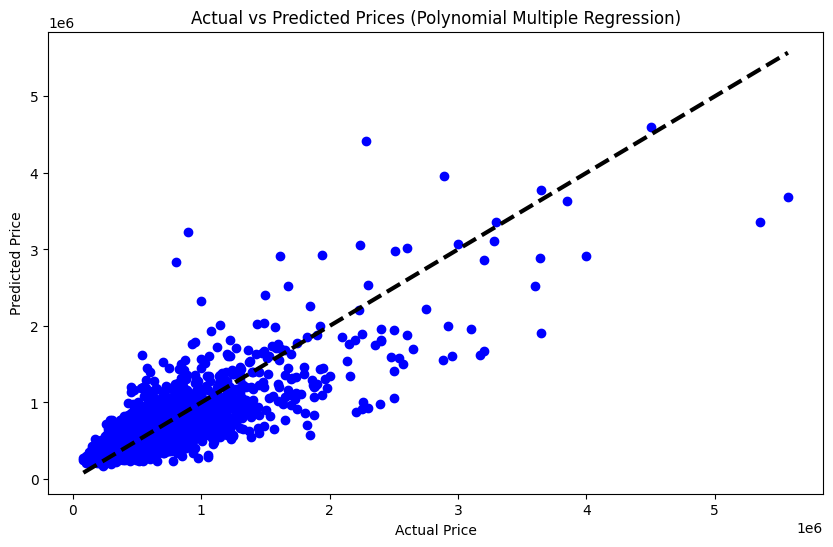

In [3]:
# List of independent variables (features) to try for polynomial multiple regression
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
            'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement']

# Target variable
y = df['price']

# Extract the selected features from the dataframe
X = df[features]  # Independent variables (multiple features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree 2 for example)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict the values using the model
y_pred = model.predict(X_test_poly)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Output the results
print("Polynomial Multiple Regression (degree 2) with all selected features:")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))

# Interpretation of results
if r2 > 0.7:
    print(f"Conclusion: The model has a strong relationship with price (R-squared = {r2:.2f}).")
elif 0.3 <= r2 <= 0.7:
    print(f"Conclusion: The model has a moderate relationship with price (R-squared = {r2:.2f}).")
else:
    print(f"Conclusion: The model has a weak relationship with price (R-squared = {r2:.2f}).")

print("-" * 50)

# Plot the predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)  # Identity line
plt.title('Actual vs Predicted Prices (Polynomial Multiple Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()
